## REGRESIÓN LOGÍSTICA

* sigmoide
* softmax (con mas parametros)
* loss (ya no MSE)
* funcion de perdida ahora, es logaritmo (investigar por que) // bianry cross entropy, log loss 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n = 100
h = n//2
dimen = 2
data = np.random.randn(n,dimen)*3
data

array([[ 2.90314318,  1.08674134],
       [ 1.6900898 ,  3.68194039],
       [-0.07100784,  1.48634947],
       [ 1.90958973,  7.28611273],
       [ 0.13428667,  3.72277142],
       [ 4.49397776, -2.60135812],
       [-1.71647489, -0.2426364 ],
       [-3.48710003, -0.4915419 ],
       [ 2.22931061, -0.22288475],
       [ 1.60771234,  2.74258526],
       [ 0.91336604, -2.63806609],
       [-2.23672803, -3.55961945],
       [-6.63524133, -1.15203777],
       [-1.35026217, -0.42670648],
       [ 0.57500196,  4.52805364],
       [-7.55500839,  0.88894334],
       [ 2.21994159,  4.89276985],
       [ 2.16105058, -3.59311415],
       [-0.67812472,  0.54483829],
       [-0.71037839,  1.65535578],
       [ 9.58824103,  2.44574024],
       [-0.59044674, -0.33715559],
       [-3.3138099 , -0.14404328],
       [ 2.0155635 ,  2.5459759 ],
       [ 2.74680112, -1.51769627],
       [ 0.52612253,  4.51361989],
       [ 0.99465617,  2.66233382],
       [ 3.08085795,  0.87538996],
       [-1.05368854,

In [19]:
print("valores de x: ",data[:,0])

valores de x:  [ 2.90314318  1.6900898  -0.07100784  1.90958973  0.13428667  4.49397776
 -1.71647489 -3.48710003  2.22931061  1.60771234  0.91336604 -2.23672803
 -6.63524133 -1.35026217  0.57500196 -7.55500839  2.21994159  2.16105058
 -0.67812472 -0.71037839  9.58824103 -0.59044674 -3.3138099   2.0155635
  2.74680112  0.52612253  0.99465617  3.08085795 -1.05368854 -2.54914574
 -2.23095165 -3.75048825  0.39862315 -1.88534389 -0.0295492   3.83327565
 -1.34274304  2.88648032 -2.16570549  2.53690179  3.51648638  2.05341788
  1.76767154  0.19209588  6.09743043 -0.40049547 -2.17804933 -2.81342871
  1.88824811 -6.64816932 -6.72380727  1.84747985 -2.77618479  7.37506913
 -2.64953054  2.89925623  3.99224947 -0.62870388 -3.46986362  0.13046718
  0.88267438 -0.81396384 -0.79673162  0.95080632 -4.84590155 -3.16420898
 -1.10180934  6.57009457 -3.44246761  0.50669676 -0.05768916  0.10716399
 -1.22296476 -2.23247526  2.1227291  -1.07441385  4.03438202 -9.86328474
  0.28343337 -1.58589012  1.16137667 

In [20]:
print("valores de y: ",data[:,1])

valores de y:  [ 1.08674134  3.68194039  1.48634947  7.28611273  3.72277142 -2.60135812
 -0.2426364  -0.4915419  -0.22288475  2.74258526 -2.63806609 -3.55961945
 -1.15203777 -0.42670648  4.52805364  0.88894334  4.89276985 -3.59311415
  0.54483829  1.65535578  2.44574024 -0.33715559 -0.14404328  2.5459759
 -1.51769627  4.51361989  2.66233382  0.87538996 -1.20966826  0.57722173
  2.34823799 -1.27166437 -2.19258366  3.3114424   1.46749132  4.59326194
  0.13038139 -6.91037034  2.227383    3.82569934  7.35895782 -3.81755665
 -1.49048616  4.24126401  1.24462819  6.10068706  1.59957501 -1.84144357
  3.88328401 -4.66631196 -0.77208577 -2.09881276  0.30594908 -5.14005733
 -4.05094705 -0.90644353 -0.19330142  1.59895614 -1.1612271   3.34717863
 -1.62423448 -2.02684412 -2.0125622  -1.84475267 -5.29542589 -3.73631096
 -3.17768873  2.40588201 -1.66029917  2.21368104  1.56518208  3.03029034
  3.38589308  4.03601991  2.83347629 -4.12511819 -4.13950543  1.88387731
 -2.56733673 -0.98729014  4.64378286 

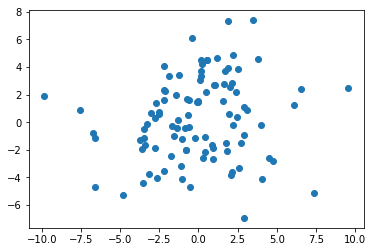

In [21]:
plt.scatter(data[:,0],data[:,1]) #las mitades(?)-revisar //eje x y y 

In [23]:
data[:h,:] #tomamos la mitad

array([[ 2.90314318,  1.08674134],
       [ 1.6900898 ,  3.68194039],
       [-0.07100784,  1.48634947],
       [ 1.90958973,  7.28611273],
       [ 0.13428667,  3.72277142],
       [ 4.49397776, -2.60135812],
       [-1.71647489, -0.2426364 ],
       [-3.48710003, -0.4915419 ],
       [ 2.22931061, -0.22288475],
       [ 1.60771234,  2.74258526],
       [ 0.91336604, -2.63806609],
       [-2.23672803, -3.55961945],
       [-6.63524133, -1.15203777],
       [-1.35026217, -0.42670648],
       [ 0.57500196,  4.52805364],
       [-7.55500839,  0.88894334],
       [ 2.21994159,  4.89276985],
       [ 2.16105058, -3.59311415],
       [-0.67812472,  0.54483829],
       [-0.71037839,  1.65535578],
       [ 9.58824103,  2.44574024],
       [-0.59044674, -0.33715559],
       [-3.3138099 , -0.14404328],
       [ 2.0155635 ,  2.5459759 ],
       [ 2.74680112, -1.51769627],
       [ 0.52612253,  4.51361989],
       [ 0.99465617,  2.66233382],
       [ 3.08085795,  0.87538996],
       [-1.05368854,

In [25]:
data[:h,:] = data[:h,:] -3*np.ones((h,dimen)) #le indicamos a esta mitad que el resultado este mas cerca del resultado (????)

In [26]:
data[h:,:] = data[h:,:]+3*np.ones((h,dimen))

ahora los datos están mas cerca de 3 y -3 (?)

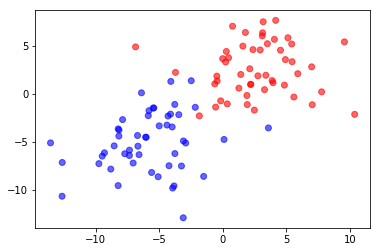

In [33]:
colors = ['blue','red']

color = np.array([colors[0]]*h+[colors[1]]*h).reshape(n) #?
plt.scatter(data[:,0],data[:,1],c=color, alpha=0.6) #las mitades(?)-revisar //eje x y y 

In [36]:
target = np.array([0]*h + [1]*h).reshape(n,1) #binarizamos


In [37]:
target

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    